In [5]:
import os
import torch
import torch_geometric
from torch_geometric.datasets import TUDataset

/home/danqingwang/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
root = 'data/aids'

In [16]:
graphs = TUDataset(root=os.path.join(root, 'tudataset'), name='PROTEINS')

Extracting data/aids/tudataset/PROTEINS/PROTEINS.zip
Processing...
Done!


In [22]:
graph = graphs[0]

In [23]:
graph

Data(edge_index=[2, 162], x=[42, 3], y=[1])

In [24]:
x_all = []
for graph in graphs:
    x_all.append(graph.x.sum(dim=0))
x_all = torch.stack(x_all).sum(dim=0)
atoms_to_keep = torch.where(x_all > 50)[0]
print(f'There are {len(atoms_to_keep)} valid number of labels!')

There are 3 valid number of labels!


In [25]:
atoms_to_keep

tensor([0, 1, 2])

In [26]:
node_mapping = [x.strip().split('\t') for x in open(os.path.join(root, 'raw/node_mapping.txt'))]
node_mapping = dict([(int(x),y) for x, y in node_mapping])

In [27]:
node_mapping

{0: 'C',
 1: 'O',
 2: 'N',
 3: 'Cl',
 4: 'F',
 5: 'S',
 6: 'Se',
 7: 'P',
 8: 'Na',
 9: 'I',
 10: 'Co',
 11: 'Br',
 12: 'Li',
 13: 'Si',
 14: 'Mg',
 15: 'Cu',
 16: 'As',
 17: 'B',
 18: 'Pt',
 19: 'Ru',
 20: 'K',
 21: 'Pd',
 22: 'Au',
 23: 'Te',
 24: 'W',
 25: 'Rh',
 26: 'Zn',
 27: 'Bi',
 28: 'Pb',
 29: 'Ge',
 30: 'Sb',
 31: 'Sn',
 32: 'Ga',
 33: 'Hg',
 34: 'Ho',
 35: 'Tl',
 36: 'Ni',
 37: 'Tb'}

In [28]:
keep_node_mapping = [node_mapping[x.item()] for x in atoms_to_keep]

In [29]:
graph.edge_index

tensor([[ 0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,
          5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10,
         10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
         15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19,
         19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 24, 24,
         24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 29,
         29, 29, 29, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 33, 33, 33, 33,
         34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 37, 37, 37, 37, 38, 38,
         38, 39, 39, 39],
        [ 8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27,
         29, 30, 31, 32, 33, 34, 35, 37, 38, 39,  0,  9, 10,  0,  8, 10, 11,  0,
          8,  9, 11,  0,  9, 10, 12, 28, 11, 13, 27,  1, 12, 14, 15,  1, 13, 15,
          1, 13, 14, 16,  2, 15, 17, 18,  2, 16, 18, 19,  2, 16, 17, 19,  2, 17,
  

In [30]:
graph.y

tensor([1])

# Preprocess Dataset

In [31]:
data0 = torch.load('data/aids/processed/data_0.pt')

In [32]:
data0.edge_attr

tensor([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
data0

Data(x=[47, 9], edge_index=[2, 106], edge_attr=[106], y=1, num_nodes=47)

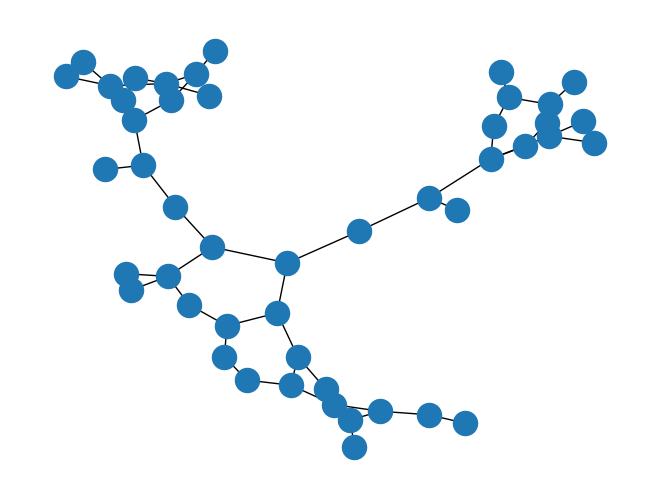

In [34]:
import networkx as nx
g = torch_geometric.utils.to_networkx(data0, to_undirected=True)
nx.draw(g)

In [10]:
data0.edge_index

tensor([[ 0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  6,  6,
          7,  7,  7,  8,  8,  8,  9,  9, 10, 11, 11, 12, 12, 12, 12, 13, 13, 13,
         14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19,
         20, 20, 21, 21, 21, 21, 22, 23, 23, 23, 24, 24, 25, 26, 27, 28, 28, 28,
         28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 34, 34,
         35, 36, 36, 36, 37, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45, 46],
        [ 1,  5,  0,  2, 11,  1,  3, 14,  2,  4,  6,  3,  5,  9,  0,  4,  3,  7,
          6,  8, 10,  7,  9, 45,  4,  8,  7,  1, 12, 11, 13, 26, 27, 12, 14, 37,
          2, 13, 24, 16, 20, 21, 23, 15, 17, 16, 18, 17, 19, 21, 43, 18, 20, 22,
         15, 19, 15, 18, 41, 42, 19, 15, 24, 25, 14, 23, 23, 12, 12, 29, 33, 34,
         36, 28, 30, 29, 31, 30, 32, 34, 44, 31, 33, 35, 28, 32, 28, 31, 39, 40,
         32, 28, 37, 38, 13, 36, 36, 34, 34, 21, 21, 18, 31,  8, 46, 45]])

In [49]:
data0.edge_index[:,0]

tensor([0, 1])

In [45]:
data0.x

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0

In [1]:
from rdkit import Chem
import matplotlib.pyplot as plt

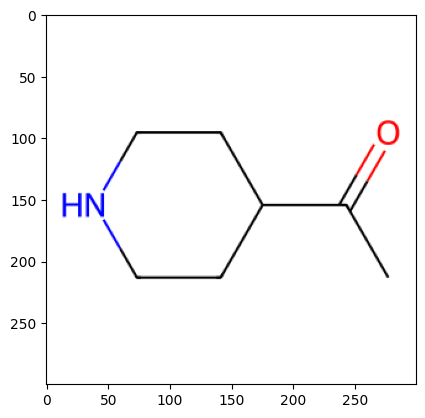

In [11]:
mol = Chem.MolFromSmiles('C1CNCCC1C(=O)C')
im = Chem.Draw.MolToImage(mol)
plt.imshow(im)

In [60]:
def MolFromGraphs(Graph, keep_node_mapping):

    # create empty editable mol object
    mol = Chem.RWMol()

    node_list = Graph.x             # [node_num, node_type]
    edge_index = Graph.edge_index.T # [edge_num, 2]
    edge_attr = Graph.edge_attr     # [edge_num]


    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        node_cls_idx = torch.argmax(node_list[i]).item()
        node = keep_node_mapping[node_cls_idx]
        # print(node_cls_idx, node)
        a = Chem.Atom(node)
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    existing_edges = []
    for idx in range(edge_index.size(0)):
        edge = edge_index[idx]
        ix, iy = edge[0].item(), edge[1].item()
        if (iy, ix) in existing_edges:
            continue
        else:
            existing_edges.append((ix, iy))

        if edge_index is not None:
            bond_type_id = edge_attr[idx]
            if bond_type_id == 0:
                bond_type = Chem.rdchem.BondType.SINGLE
            elif bond_type_id == 1:
                bond_type = Chem.rdchem.BondType.DOUBLE
            elif bond_type_id == 2:
                bond_type = Chem.rdchem.BondType.TRIPLE
            mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
        else:
            mol.AddBond(node_to_idx[ix], node_to_idx[iy])
    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol

m = MolFromGraphs(data0, node_mapping)
molstr = Chem.MolToSmiles(m)
print(molstr)

COC1=CC2=C(OC1=O)C1=C(C=C2)OC(C)(C)C(OC(=O)C23CCC(C)(C(=O)O2)C3(C)C)C1OC(=O)C12CCC(C)(C(=O)O1)C2(C)C


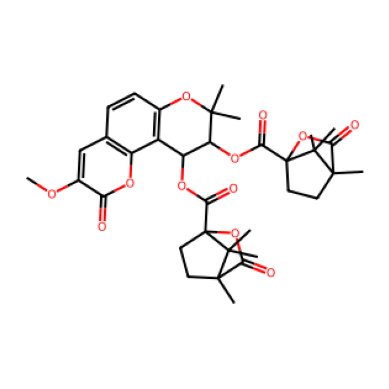

In [36]:
mol = Chem.MolFromSmiles(molstr)
im = Chem.Draw.MolToImage(mol)
plt.axis('off')
plt.imshow(im)

In [37]:
problems = Chem.DetectChemistryProblems(mol)
print(len(problems))

0


In [62]:
teststr="COC1=CC2=C(OC1=O)C1=C(C=C2)OC(C)(C)C(OC(=O)C23CCC(C)(C(=O)O2)C3(C)C)C1OC(=O)C12CCC(C)(C(=O)O1)C2(C)C"
testm = Chem.MolFromSmiles(teststr, sanitize=False)
problems = Chem.DetectChemistryProblems(m)
print(len(problems))

0


## Result

In [30]:
summary = torch.load('results/aids/runs/counterfactuals.pt')

In [5]:
summary.keys()

dict_keys(['graph_map', 'graph_index_map', 'counterfactual_candidates', 'MAX_COUNTERFACTUAL_SIZE', 'traversed_hashes', 'input_graphs_covered'])

In [27]:
len(summary['graph_map']), len(summary['input_graphs_covered'])

(7619, 1473)

In [26]:
summary['graph_index_map']

{6663933321034628463: 3107,
 1947875734340658193: 4621,
 2435496519213836875: 7453,
 -8646849708571681348: 550,
 7443529129052166992: 971,
 2297993210145131855: 1545,
 -6534769230447601538: 1530,
 2323855802142003610: 1857,
 4838661483694274226: 1873,
 6601142565894378249: 2007,
 -8949514456392019492: 2314,
 5978902711534699949: 2852,
 -4535602208930991773: 1640,
 5484010582323671802: 11,
 -397292802565466641: 3130,
 3106756787931279922: 3365,
 2605685556699539069: 3372,
 -3839915370844481740: 4504,
 2285377363204694875: 4536,
 8303490125413059846: 4538,
 3846823735915214547: 349,
 5786054124594531990: 4748,
 8853637506196353799: 4833,
 6986817897517391146: 5885,
 547398363401256501: 5919,
 -5178621443588099036: 6013,
 2497333666270852179: 6056,
 4782686929318580038: 716,
 3847324234802765610: 6484,
 7648952505741646766: 6485,
 -4269541414320087484: 6496,
 9186711871672445027: 6529,
 2298654271300412419: 6439,
 -6117842976876158762: 6973,
 -5636094650170361497: 57,
 -476746524824461170

In [46]:
summary['graph_map'][7760922899577965957]

Data(x=[11, 9], edge_index=[2, 22], edge_attr=[24], y=0, num_nodes=11)